#K-Nearest Neighbour
K-NN or K Nearest Neighbour is a easy to understand but one of the powerful and topmost machine learning algorithm. We will mainly be exploring this technique as Classification approach in this module

#Scikit-Learn Library:


- This is one of the popular and powerful libraries in Python used for predictive Analysis
-Open Source, Accessible and Reusable in various ways
-Various **Popular example Datasets** are available within this library for practicing different **Supervised Learning Techniques, such as, Regression and Classification**
- Scikit-Learn is built on **NumPy** , **SciPy** and **Matplotlib**, which you are already familiarized with

# New Section

In this lab we will use the well-known Iris dataset to build and analyse the performance of multi-class classifiers. We will first consider a **kNN** classifier and analyse the impact of changing the value of k on the resulting decision regions.

In general we won't be able to visualise our datasets and error surfaces in the same way, as the predictor space will have a high dimensionality (i.e. there will be many predictors). Even though we won't be able to visualise decision regions in a 10D or 200D space, decision regions still exist and our methods will work in exactly the same way. The trick is to understand and carry out all our mental experiments in low-dimensional spaces, and then assume everything works in the same way in high-dimensional spaces.

# The Iris dataset

The Iris flower dataset is a classic dataset used to identify three flower species based on features describing their [sepals](https://en.wikipedia.org/wiki/Sepalhttps://) and [petals](https://en.wikipedia.org/wiki/Petal). Let's load it first and print its description.

As read in the description, the Iris dataset consists of 150 samples described by 5 attributes. Four of them will be used used as predictors (the flowers' features) and the fifth one will be used as a discrete label. 

The predictors are:
- Sepal length.
- Sepal width.
- Petal length. 
- Petal width.

The label can take on three different values, in other words, there are three classes in the Iris dataset, which are:
- Setosa.
- Versicolor.
- Virginica.

Each class corresponds to a different flower species. Hence, the Iris dataset can be used to build machine learning models that identify one of these flowers species by looking at the 4 features describing their petals and sepals. 


In [ ]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Let's load the predictors and label into two separate NumPy arrays `x_iris` and `y_iris` and check their shape:

In [ ]:
x_iris = iris.data
y_iris = iris.target

print("The shape of the NumPy array x_iris containing the predictors is:", x_iris.shape)
print("The shape of the NumPy array y_iris containing the label is:",y_iris.shape)
print (y_iris)

The shape of the NumPy array x_iris containing the predictors is: (150, 4)
The shape of the NumPy array y_iris containing the label is: (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
#my code:
print (x_iris)
print (y_iris)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Now, we will use the first two predictors (sepal length and sepal width), as we can easily visualise 2D predictors space. Let's store the two predictors in a new NumPy array:

(We are doing index splicing in this step. You can check the uploaded "iris dataset" on Moodle to understand how the splicing worked on the dataset. Remember that, we don't need to load the data this time as this dataset has been imported from scikit-learn library.)

In [ ]:
x_iris_sepal = iris.data[:, :2] 

print("The first two predictors are", iris.feature_names[:2])
print("The shape of the NumPy array x_iris_sepal containing the first two pre predictors is", x_iris_sepal.shape)

The first two predictors are ['sepal length (cm)', 'sepal width (cm)']
The shape of the NumPy array x_iris_sepal containing the first two pre predictors is (150, 2)


In [ ]:
#my code:
print(x_iris_sepal)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

As expected, the shape of the NumPy array `x_iris_sepal` is `(150, 2)`, which means there are 150 samples desribed by 2 predictors. 

Let's plot the dataset in the predictor space. We will use 3 different symbols to represent each of the 3 different values that the label `y_iris` can take on, namely 0 (setosa), 1 (versicolor) and 2 (virginica).

In [ ]:
print(y_iris==0,1) # It works like a simple if-else condition here.

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False] 1


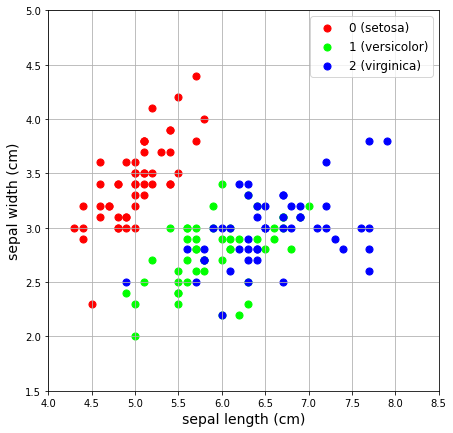

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))

scatter = plt.scatter(x_iris_sepal[y_iris==0,0], x_iris_sepal[y_iris==0,1], s=50 , color= '#FF0000', label='{:d} ({:s})'.format(0, iris.target_names[0]))
scatter = plt.scatter(x_iris_sepal[y_iris==1,0], x_iris_sepal[y_iris==1,1], s=50 , color= '#00FF00', label='{:d} ({:s})'.format(1, iris.target_names[1]))
scatter = plt.scatter(x_iris_sepal[y_iris==2,0], x_iris_sepal[y_iris==2,1], s=50 , color= '#0000FF', label='{:d} ({:s})'.format(2, iris.target_names[2]))

plt.legend(fontsize=12)
plt.xlabel(iris.feature_names[0], fontsize=14)
plt.ylabel(iris.feature_names[1], fontsize=14)
plt.xlim(4,8.5)
plt.ylim(1.5,5)
plt.grid(True)
plt.show()

Plotting the dataset in the predictor space reveals that the three classes are not linearly separable, i.e. we cannot create straight boundaries in the predictor space that separate samples from different classes. Can you visualise a non-linear boundary capable of separating the three classes? 


Let's split the dataset into a training dataset and a validation dataset that we will use to assess the deployent performance of our models. In general we will need to carefully determine how many samples should be used for training and for validation. However for the purpose of this lab, let's assume that 75 samples are sufficient for training and validation purposes. After splitting, let's plot the training and validation datasets.

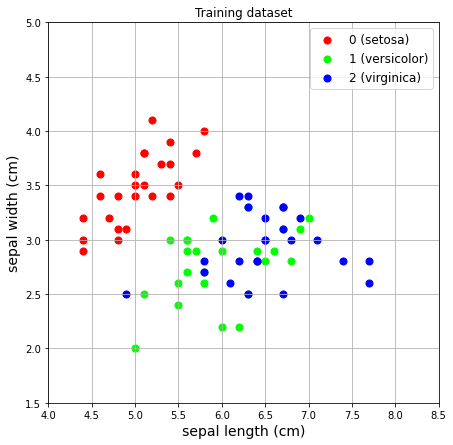

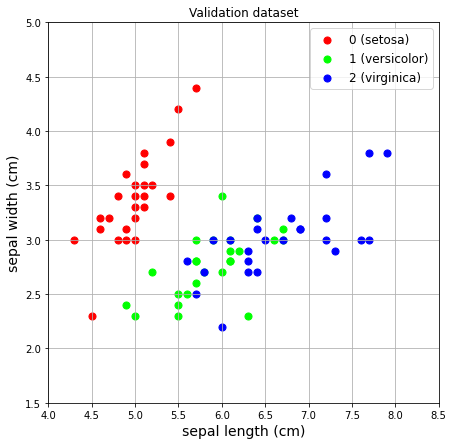

In [ ]:
# Here we split our dataset into training and validation datasets
x_train = x_iris_sepal[::2,:] # train data set (both predictors)
y_train = y_iris[::2] # train data set (labels)
x_val = x_iris_sepal[1::2,:] # test data set (both predictors)
y_val = y_iris[1::2] # test data set (labels)


# The rest of this cell is used to plot the training and validation datasets
plt.figure(figsize=(7, 7))

scatter = plt.scatter(x_train[y_train==0,0], x_train[y_train==0,1], s=50 , color= '#FF0000', label='{:d} ({:s})'.format(0, iris.target_names[0]))
scatter = plt.scatter(x_train[y_train==1,0], x_train[y_train==1,1], s=50 , color= '#00FF00', label='{:d} ({:s})'.format(1, iris.target_names[1]))
scatter = plt.scatter(x_train[y_train==2,0], x_train[y_train==2,1], s=50 , color= '#0000FF', label='{:d} ({:s})'.format(2, iris.target_names[2]))

plt.title("Training dataset")
plt.legend(fontsize=12)
plt.xlabel(iris.feature_names[0], fontsize=14)
plt.ylabel(iris.feature_names[1], fontsize=14)
plt.xlim(4,8.5)
plt.ylim(1.5,5)
plt.grid(True)

plt.figure(figsize=(7, 7))

scatter = plt.scatter(x_val[y_val==0,0], x_val[y_val==0,1], s=50 , color= '#FF0000', label='{:d} ({:s})'.format(0, iris.target_names[0]))
scatter = plt.scatter(x_val[y_val==1,0], x_val[y_val==1,1], s=50 , color= '#00FF00', label='{:d} ({:s})'.format(1, iris.target_names[1]))
scatter = plt.scatter(x_val[y_val==2,0], x_val[y_val==2,1], s=50 , color= '#0000FF', label='{:d} ({:s})'.format(2, iris.target_names[2]))

plt.title("Validation dataset")
plt.legend(fontsize=12)
plt.xlabel(iris.feature_names[0], fontsize=14)
plt.ylabel(iris.feature_names[1], fontsize=14)
plt.xlim(4,8.5)
plt.ylim(1.5,5)
plt.grid(True)
plt.show()

In [ ]:
#my code:
print(x_train)
print("######")
print(y_train)
print("######")
print(x_val)
print("######")
print(y_val)

[[5.1 3.5]
 [4.7 3.2]
 [5.  3.6]
 [4.6 3.4]
 [4.4 2.9]
 [5.4 3.7]
 [4.8 3. ]
 [5.8 4. ]
 [5.4 3.9]
 [5.7 3.8]
 [5.4 3.4]
 [4.6 3.6]
 [4.8 3.4]
 [5.  3.4]
 [5.2 3.4]
 [4.8 3.1]
 [5.2 4.1]
 [4.9 3.1]
 [5.5 3.5]
 [4.4 3. ]
 [5.  3.5]
 [4.4 3.2]
 [5.1 3.8]
 [5.1 3.8]
 [5.3 3.7]
 [7.  3.2]
 [6.9 3.1]
 [6.5 2.8]
 [6.3 3.3]
 [6.6 2.9]
 [5.  2. ]
 [6.  2.2]
 [5.6 2.9]
 [5.6 3. ]
 [6.2 2.2]
 [5.9 3.2]
 [6.3 2.5]
 [6.4 2.9]
 [6.8 2.8]
 [6.  2.9]
 [5.5 2.4]
 [5.8 2.7]
 [5.4 3. ]
 [6.7 3.1]
 [5.6 3. ]
 [5.5 2.6]
 [5.8 2.6]
 [5.6 2.7]
 [5.7 2.9]
 [5.1 2.5]
 [6.3 3.3]
 [7.1 3. ]
 [6.5 3. ]
 [4.9 2.5]
 [6.7 2.5]
 [6.5 3.2]
 [6.8 3. ]
 [5.8 2.8]
 [6.5 3. ]
 [7.7 2.6]
 [6.9 3.2]
 [7.7 2.8]
 [6.7 3.3]
 [6.2 2.8]
 [6.4 2.8]
 [7.4 2.8]
 [6.4 2.8]
 [6.1 2.6]
 [6.3 3.4]
 [6.  3. ]
 [6.7 3.1]
 [5.8 2.7]
 [6.7 3.3]
 [6.3 2.5]
 [6.2 3.4]]
######
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
######
[[4.9 

# K-NN classifiers

K-NN algorithm is an instance-based method that assigns a new sample to the **majotiry class** amongst the k closest training samples. From a statistical point of view, we can see K-NN as a method that creates **posterior probabilities** by identifying the closest training samples and obtaining the fraction of samples belonging to each class.

We could easily implement kNN ourselves, however we will use the implementation provided by the [scikit-learn](https://scikit-learn.org/stable/) library.  **Scikit library** is the most important Python library for machine learning and also a good place to learn and try new machine learning methods. 

In the cell below we will create several kNN classifiers for different values of k, will show the resulting decision regions and finally will obtain their validation accuracy. Note that k shouldn't be seen as a parameter of our model, but rather as a **hyperparameter**. In machine learning parameters are adjusted (for instance the intercept and slope of a straight line), while hyperparameters define families of models that behave very differently. 

The kNN algorithm is a strange one, in that there are **no parameters to adjust** and there is one hyperparameter.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 1 is  0.68


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 7 is  0.7733333333333333


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 13 is  0.7733333333333333


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 19 is  0.8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 25 is  0.84


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 31 is  0.8266666666666667


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 37 is  0.8133333333333334


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 43 is  0.76


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 49 is  0.7333333333333333


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 55 is  0.7733333333333333


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 61 is  0.7066666666666667


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 67 is  0.6933333333333334


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 73 is  0.4666666666666667


<IPython.core.display.Javascript object>

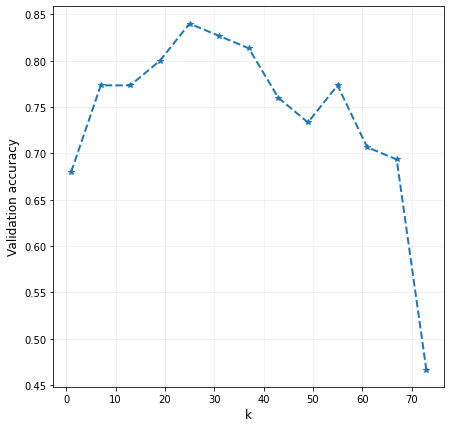

In [ ]:
from google.colab import widgets
from sklearn import neighbors
#from matplotlib.colors import ListedColormap

k_values = range(1,75,6)
tb = widgets.TabBar([str(k) for k in k_values])

#cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

accuracy = dict.fromkeys(k_values)

for k in k_values:
  with tb.output_to(str(k), select= (k < 2)):

    # First we create the kNN model
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)



    # Finally we calculate the validation accuracy
    y_val_pred = knn.predict(x_val)
    accuracy[k] = np.sum(y_val==y_val_pred)/len(y_val)

    print("The validation accuracy for k=", k, "is ", accuracy[k])


# Here we predict the value of the validation accuracy as a function of k
plt.figure(figsize=(7, 7))
plt.plot(k_values, list(accuracy.values()), '--*', linewidth=2)
plt.xlabel("k", fontsize=12)
plt.ylabel("Validation accuracy", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

In [ ]:
#my code:
print(accuracy[k])

0.4666666666666667


#Question:1
Now, based on this simple validation approach, which value of "K" would you select and why?

Once, you decide about the value for "K", you should now be able to predict a suitable classification for an unseen datapoint. 

Let's now find a classification for (5,1), where 5 is the Sepal length and, 1 is Sepal width.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=25)

# Train the model using the training sets
model.fit(x_iris_sepal,y_iris)

#Predict Output
predicted= model.predict([[5,1]]) 
print(predicted)

NameError: ignored

The output is "1" and "1" is equivalent to "versicolor", as we encoded it previously.

#Question:2
Now, use a K-NN Model to fit "petal height" and "petal width" predictors from the same dataset and predict classification for (4,2), where 4 is the Petal length and, 2 is Petal width.

In [ ]:
#my solution:
x_iris_sepal = iris.data[:, 2:4] 

print("The first two predictors are", iris.feature_names[2:4])
print("The shape of the NumPy array x_iris_sepal containing the first two pre predictors is", x_iris_sepal.shape)


# Here we split our dataset into training and validation datasets
x_train = x_iris_sepal[:2:4,:] # train data set (both predictors)
y_train = y_iris[:2:4] # train data set (labels)
x_val = x_iris_sepal[1:2:4,:] # test data set (both predictors)
y_val = y_iris[1:2:4] # test data set (labels)


# The rest of this cell is used to plot the training and validation datasets
plt.figure(figsize=(7, 7))

scatter = plt.scatter(x_train[y_train==0,2], x_train[y_train==0,4], s=50 , color= '#FF0000', label='{:d} ({:s})'.format(0, iris.target_names[0]))
scatter = plt.scatter(x_train[y_train==1,2], x_train[y_train==1,4], s=50 , color= '#00FF00', label='{:d} ({:s})'.format(1, iris.target_names[1]))
scatter = plt.scatter(x_train[y_train==2,2], x_train[y_train==2,4], s=50 , color= '#0000FF', label='{:d} ({:s})'.format(2, iris.target_names[2]))

plt.title("Training dataset")
plt.legend(fontsize=12)
plt.xlabel(iris.feature_names[0], fontsize=14)
plt.ylabel(iris.feature_names[1], fontsize=14)
plt.xlim(4,8.5)
plt.ylim(1.5,5)
plt.grid(True)

plt.figure(figsize=(7, 7))

scatter = plt.scatter(x_val[y_val==0,0], x_val[y_val==0,1], s=50 , color= '#FF0000', label='{:d} ({:s})'.format(0, iris.target_names[0]))
scatter = plt.scatter(x_val[y_val==1,0], x_val[y_val==1,1], s=50 , color= '#00FF00', label='{:d} ({:s})'.format(1, iris.target_names[1]))
scatter = plt.scatter(x_val[y_val==2,0], x_val[y_val==2,1], s=50 , color= '#0000FF', label='{:d} ({:s})'.format(2, iris.target_names[2]))

plt.title("Validation dataset")
plt.legend(fontsize=12)
plt.xlabel(iris.feature_names[0], fontsize=14)
plt.ylabel(iris.feature_names[1], fontsize=14)
plt.xlim(4,8.5)
plt.ylim(1.5,5)
plt.grid(True)
plt.show()

The first two predictors are ['petal length (cm)', 'petal width (cm)']
The shape of the NumPy array x_iris_sepal containing the first two pre predictors is (150, 2)


IndexError: ignored

<Figure size 504x504 with 0 Axes>

In [ ]:
#Solution 2:
#see moodle Kimia